### Connect the 500Gb orange disk (AIA-FOXSI2 Data)

This notebook is working with Sunpy version 0.8.3 (2018-April)

## Goal: To find AIA brightnings in all AIA-wavelenghts for the times and targets FOXSI2 observed.

### @Milo

In [1]:
import glob
from sunpy.map import Map
from sunpy.time import TimeRange
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### FOXSI2 targets and times

In [2]:
Ftarget = {'cen1_pos0':(359.0, -431.0), # arcsec
           'cen1_pos1':(-1.0, -431.0),
           'cen1_pos2':(-1.0, -251.0),
           'cen2_pos0':(-1.0, -281.0),
           'cen2_pos1':(-390.0, -281.0),
           'cen3_pos0':(1210.5, -431.5),
           'cen3_pos1':(850.0, -431.5),
           'cen3_pos2':(850.0, -251.0),
           'cen4':(200.0, 750.0),
           'cen5':(0.0, -251.0),
           'cen_Iris':(11,-260)}
Ftimes = {'cen1_pos0': TimeRange(['2014-12-11 19:12:42', '2014-12-11 19:13:14.3']),
            'cen1_pos1':TimeRange(['2014-12-11 19:13:18','2014-12-11 19:13:42.6']),
            'cen1_pos2':TimeRange(['2014-12-11 19:13:46.5','2014-12-11 19:14:25']),
            'cen2_pos0':TimeRange(['2014-12-11 19:14:29','2014-12-11 19:14:39.6']),
            'cen2_pos1':TimeRange(['2014-12-11 19:14:44','2014-12-11 19:15:36.7']),
            'cen3_pos0':TimeRange(['2014-12-11 19:15:40.6','2014-12-11 19:16:07.2']),
            'cen3_pos1':TimeRange(['2014-12-11 19:16:11','2014-12-11 19:16:30.1']),
            'cen3_pos2':TimeRange(['2014-12-11 19:16:34','2014-12-11 19:17:09.2']),
            'cen4':TimeRange(['2014-12-11 19:17:13.5','2014-12-11 19:18:46.2']),
            'cen5':TimeRange(['2014-12-11 19:18:50.5','2014-12-11 19:19:23.2']),
            't_shtr':TimeRange(['2014-12-11 19:18:18','2014-12-11 19:18:22']),
            'Iris_Obs':TimeRange(['2014-12-11 19:12:22','2014-12-11 19:39:01'])}
fov = (1000,1000) # arcsec

## STD function definition

In [3]:
def std(cmaps):
    """
    Calculate the standard deviation of the data array.
    """
    _meta = []
    for i, m in enumerate(cmaps):
        _meta.append(m.meta)
    data = np.zeros((cmaps[0].data.shape[0], cmaps[0].data.shape[1], len(cmaps)), dtype=cmaps[0].data.dtype)
    for i, m in enumerate(cmaps):
        data[:, :, i] = m.data
    return Map(np.std(data, axis=2), _meta[1])

## Reading AIA data:

In [4]:
data_dir = '/Volumes/Storage/FOXSI/AIA/'
str_indices = {'94':'', '131':'', '171':'', '193':'', '211':'', '304':'', '335':'', '1600':'', '1700':''}
file_list = {}
maps = {}
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + key + '*.fits')})

In [5]:
these_files = file_list['94'][70:90]
maps = []
for f in these_files:
    smap = Map(f)
    top_right = SkyCoord(100*u.arcsec, -170 * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord(-80 * u.arcsec, -350 * u.arcsec, frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


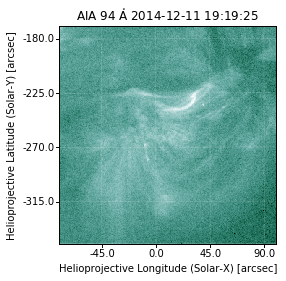

In [6]:
maps[16].plot()
plt.show()

# Target 1 Pos 0

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


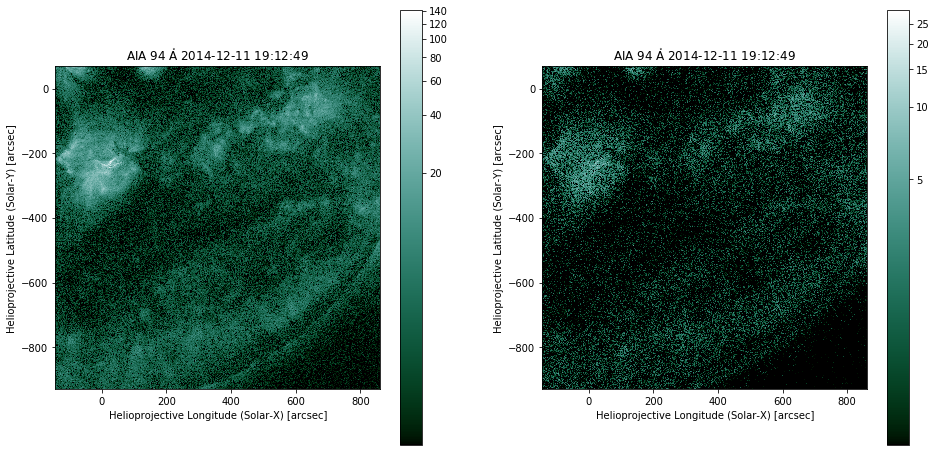

In [7]:
these_files = file_list['94'][55:59]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen1_pos0'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos0'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen1_pos0'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos0'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 1 Pos 1

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


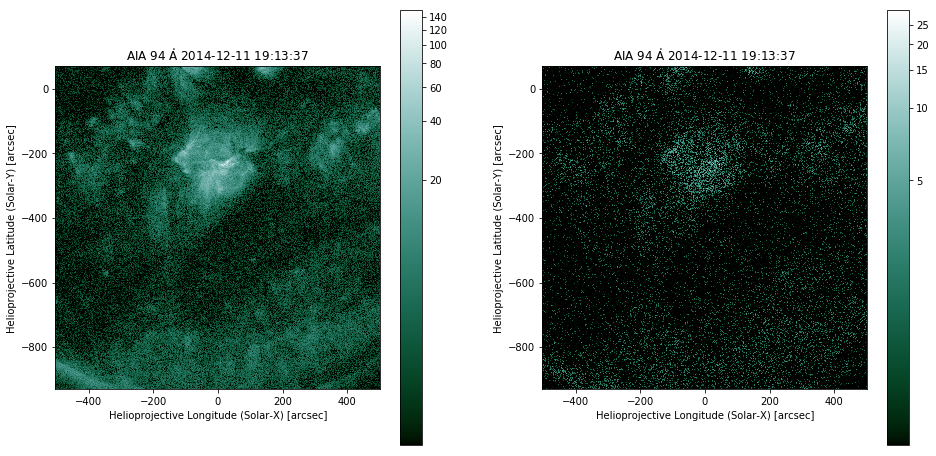

In [8]:
these_files = file_list['94'][58:60]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen1_pos1'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos1'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen1_pos1'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos1'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 1 Pos 2

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


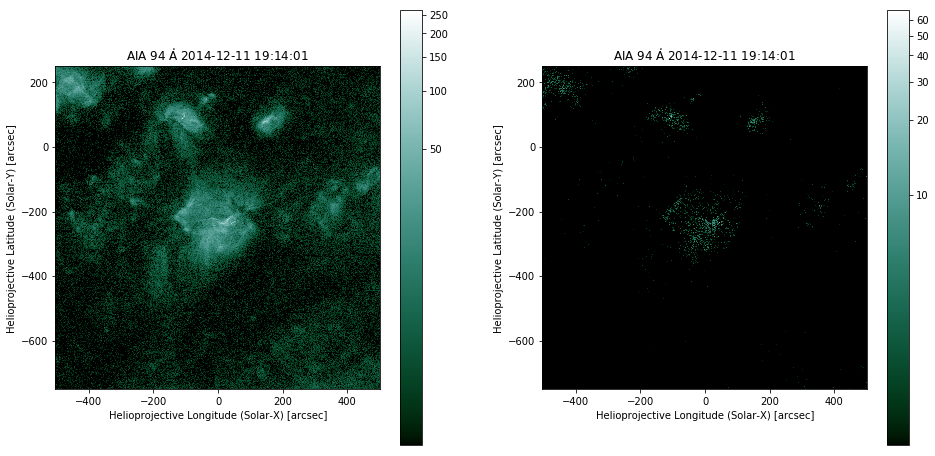

In [9]:
these_files = file_list['94'][59:63]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen1_pos2'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos2'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen1_pos2'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos2'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 2 Pos 0 

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


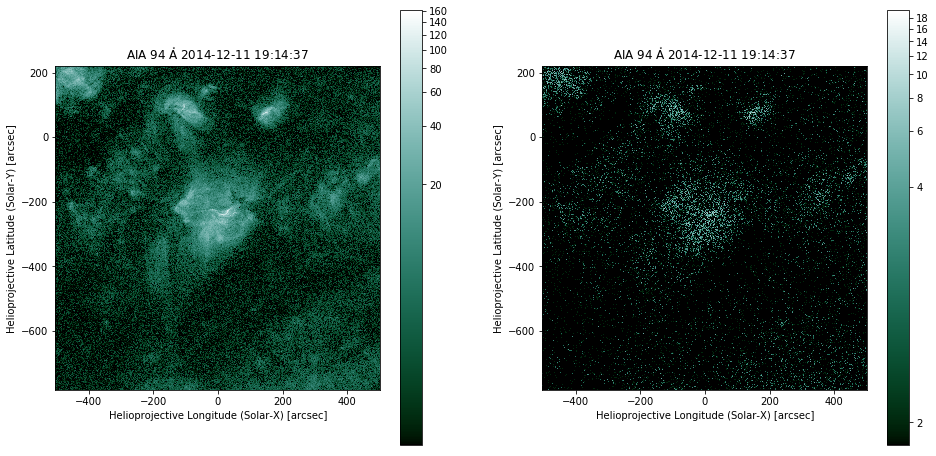

In [10]:
these_files = file_list['94'][62:64]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen2_pos0'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos0'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen2_pos0'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos0'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.1*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 2 Pos 1

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


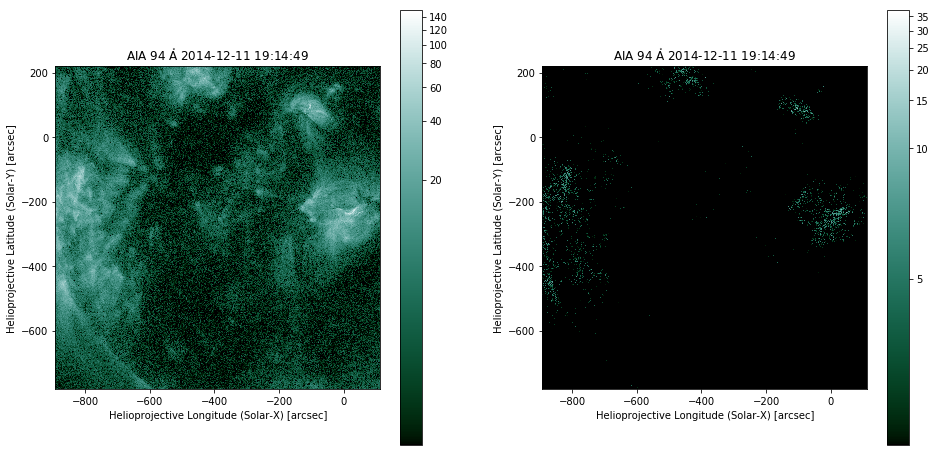

In [11]:
these_files = file_list['94'][63:68]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen2_pos1'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos1'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen2_pos1'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos1'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.1*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 3 Pos 0

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


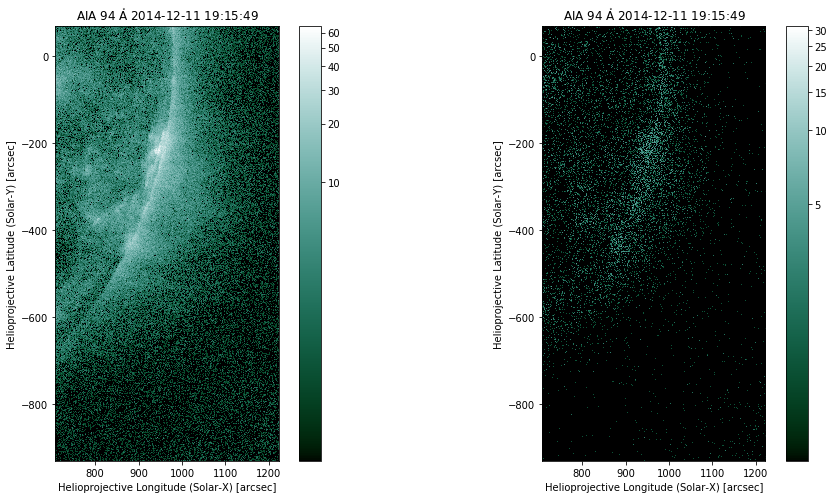

In [12]:
these_files = file_list['94'][68:70]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen3_pos0'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos0'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen3_pos0'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos0'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 3 Pos 1

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


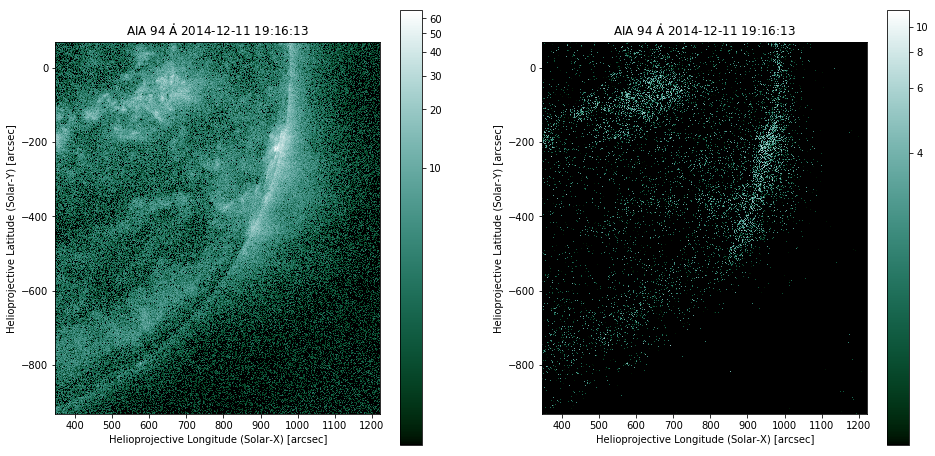

In [13]:
these_files = file_list['94'][69:72]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen3_pos1'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos1'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen3_pos1'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos1'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.2*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 3 Pos 2

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


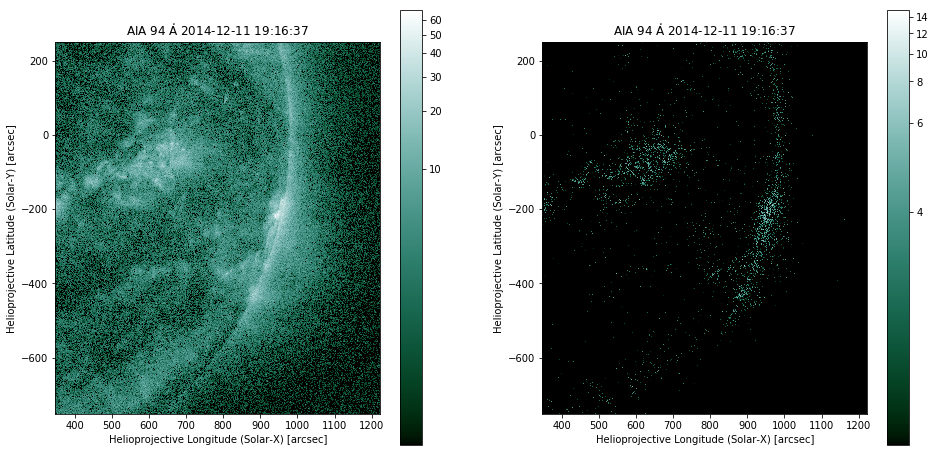

In [14]:
these_files = file_list['94'][71:75]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen3_pos2'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos2'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen3_pos2'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos2'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.2*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 4

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


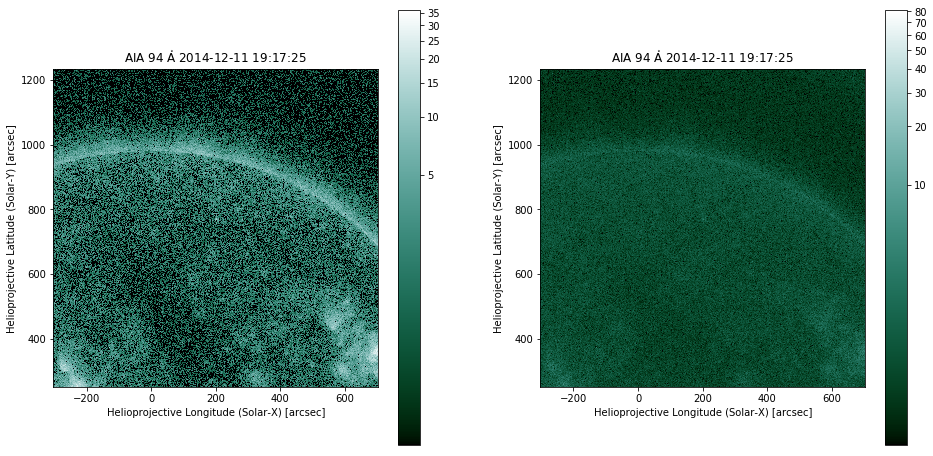

In [15]:
these_files = file_list['94'][75:83]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen4'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen4'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen4'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen4'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.005*stdmap.data.max())
plt.colorbar()
plt.show()

## Check in this set of images if ine of the images has a really bright spot. Otherwise there is bugg in the code.

# Target 5

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


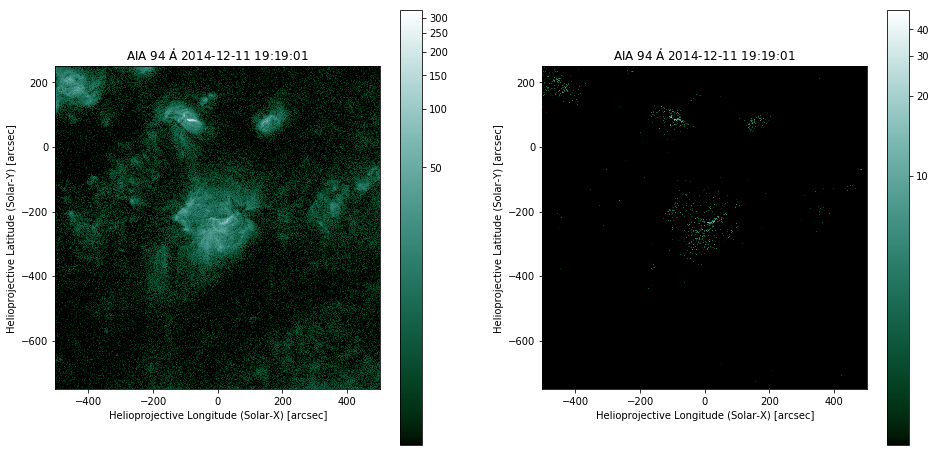

In [16]:
these_files = file_list['94'][83:86]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen5'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen5'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen5'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen5'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.08*stdmap.data.max())
plt.colorbar()
plt.show()

## Finding AIA brigthenings where IRIS observed

In [17]:
print('Iris observations: Starts at {0}, and Ends at {1}'.format(Ftimes['Iris_Obs'].start,Ftimes['Iris_Obs'].end))

Iris observations: Starts at 2014-12-11 19:12:22, and Ends at 2014-12-11 19:39:01


/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


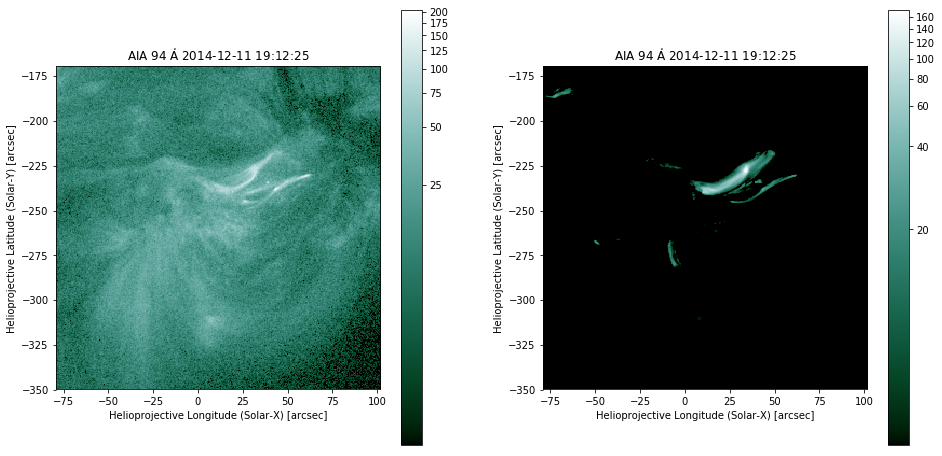

In [18]:
irisfov = [180,180] #arcsec
these_files = file_list['94'][53:176] #These correspond to IRIS obs.
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen_Iris'][0] + irisfov[0]/2) * u.arcsec, 
                           (Ftarget['cen_Iris'][1] + irisfov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen_Iris'][0] - irisfov[0]/2) * u.arcsec, 
                           (Ftarget['cen_Iris'][1] - irisfov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

## Temporal runing mean divided by the standard deviation.  Look at papers Lindsay sent to me. 

**Kobelski, McKenzie and Donachie [2014]**:  <br>
http://iopscience.iop.org/article/10.1088/0004-637X/786/2/82/pdf <br>
The detection algorithm is based on the method of Berghmans & Clette (1999), which looks for enhancements in the observed flux on a pixel by pixel basis. Enhancements in neighboring pixels are then grouped together and defined as an ARTB. <br><br/>

This approach involves subtracting a running mean from the time profile of brightness in each pixel, then looking for residuals larger than a predefined threshold, typically three standard deviations.<br><br/>

After calibration and co-alignment, a running mean of the image stack is created by applying a temporal boxcar smoothing of width $\omega_{rm}$. This temporally smoothed version of the image is then subtracted from the original image, resulting in a residual with the mean removed.
The next step is to determine the standard deviation of the light curves for each pixel in the image stack, which is used to make a ratio between the residual and the standard deviation. The “brightest” pixel in this ratio is determined to be an ARTB as long as it is greater than $q_D$, the detection threshold. All pixels in the ratio array that are larger than a second threshold, $q_C$ , are then checked for connectivity to the $q_D$ point.<br><br/>
A good $\omega_{rm}$ to start is $\approx 10$ min.

### Definign Mean funtion:

In [19]:
def mean(cmaps):
    """
    Calculate the average of the data array.
    """
    _meta = []
    for i, m in enumerate(cmaps):
        _meta.append(m.meta)
    data = np.zeros((cmaps[0].data.shape[0], cmaps[0].data.shape[1], len(cmaps)), dtype=cmaps[0].data.dtype)
    for i, m in enumerate(cmaps):
        data[:, :, i] = m.data
    return Map(np.mean(data, axis=2), _meta[1])

### Runing the mean for the Iris-AIA data:

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


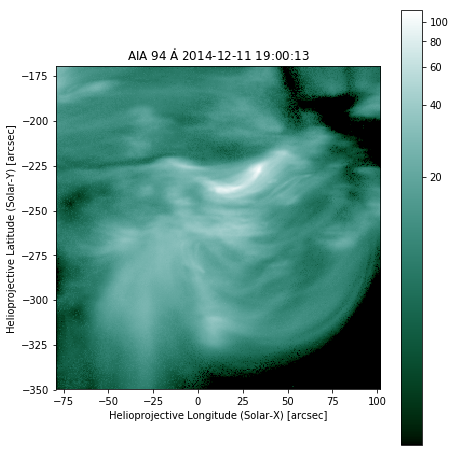

In [20]:
irisfov = [180,180] #arcsec
these_files = file_list['94'] # All maps
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen_Iris'][0] + irisfov[0]/2) * u.arcsec, 
                           (Ftarget['cen_Iris'][1] + irisfov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen_Iris'][0] - irisfov[0]/2) * u.arcsec, 
                           (Ftarget['cen_Iris'][1] - irisfov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
meanmap = mean(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
meanmap.plot(vmin=0.05*meanmap.data.max())
plt.colorbar()
plt.show()

In [21]:
wrm = 44 # (int) time width - 44 frames is equivalent to 10 min
qd = 4
qc = 3
bright_maps,maps_qd,maps_qc = [],[],[]

for i in range(53,176):
    maps_i = maps[i-wrm//2:i+wrm//2]   # Takes wrm 'frames' around frame i
    mean_i = mean(maps_i) # Calculates the mean around i
    residual_i = (maps[i].data - mean_i.data) # residual data
    std_i = std(maps[i-wrm//2:i+wrm//2]).data # STD 
    data_qd = (residual_i/std_i)
    data_qd[np.where((residual_i/std_i)<=qd)] = 0.0 # Data under QD TH
    data_qc = (residual_i/std_i)
    data_qc[np.where((residual_i/std_i)<=qc)] = 0.0 # Data under QC TH
    maps_qd.append(Map(data_qd, mean_i.meta))
    maps_qc.append(Map(data_qc, mean_i.meta))
    bright_maps.append(Map(residual_i/std_i, mean_i.meta))


/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1735: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


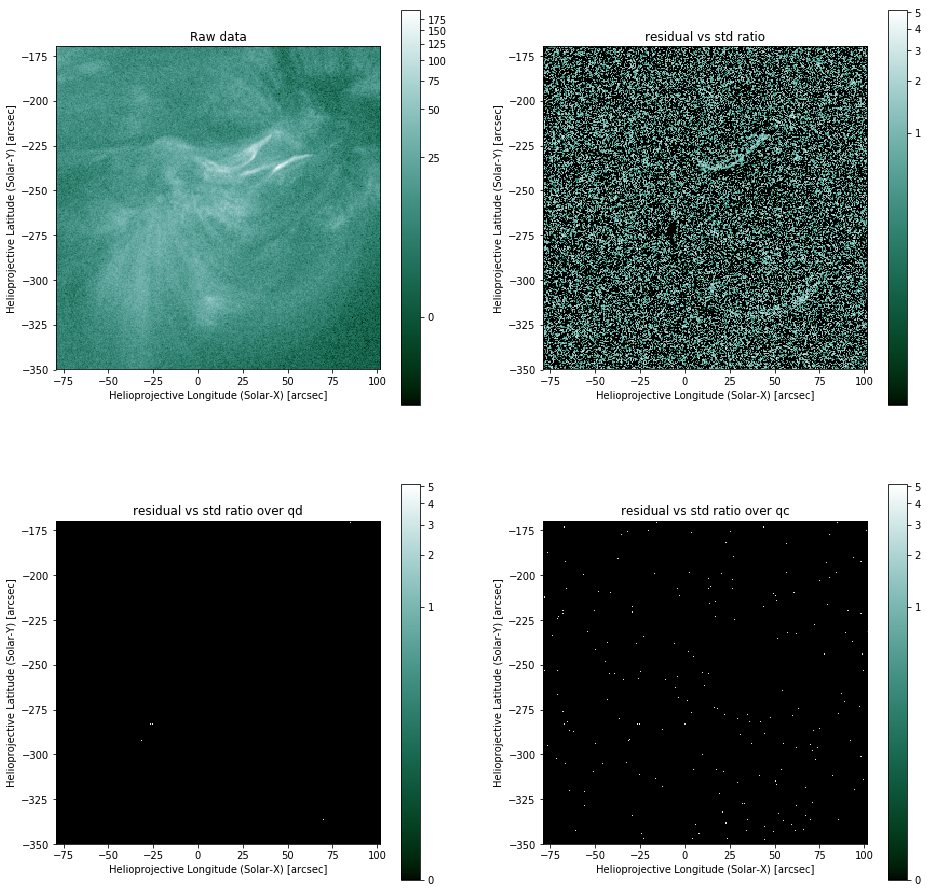

In [22]:
i = 50
%matplotlib inline
'''Plotting'''
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
maps[i].plot(title='Raw data')
plt.colorbar()
plt.subplot(2,2,2)
bright_maps[i].plot(vmin=0.01, title='residual vs std ratio')
plt.colorbar()
plt.subplot(2,2,3)
maps_qd[i].plot(title='residual vs std ratio over qd')
plt.colorbar()
plt.subplot(2,2,4)
maps_qc[i].plot(title='residual vs std ratio over qc')
plt.colorbar()
plt.show()

### Making a 3D map for animation porposes:

**Using Sunpy** 

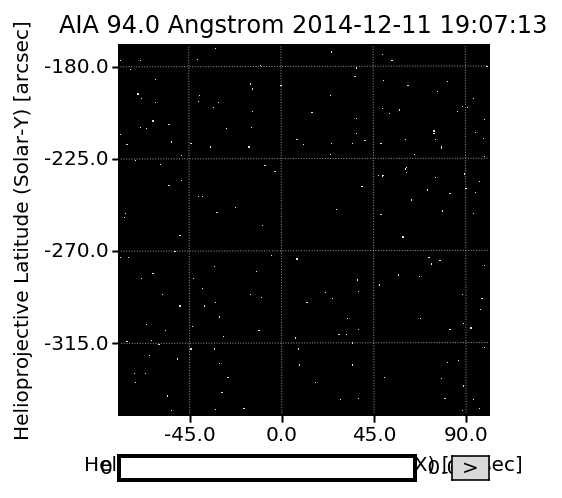

In [23]:
%matplotlib qt
from sunpy.map import MapCube
from sunpy.visualization.mapcubeanimator import MapCubeAnimator

Animate = MapCube(maps_qc)
MapCubeAnimator(Animate)

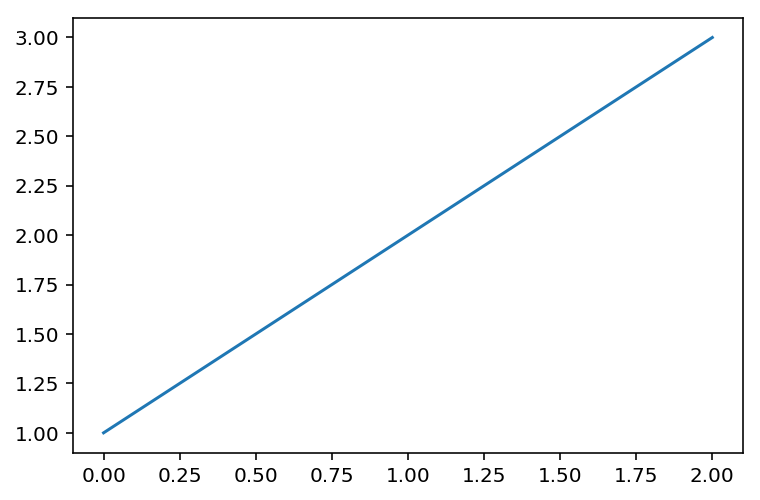

In [24]:
%matplotlib qt
plt.plot([1,2,3])
plt.show()

## Implement Sunpy find bright regions:

In [25]:
from scipy import ndimage
import matplotlib.pyplot as plt

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE, AIA_094_IMAGE

In [26]:
#aiamap = sunpy.map.Map(AIA_094_IMAGE)
aiamap = sunpy.map.Map('/Volumes/Storage/FOXSI/AIA/aia_lev1_94a_2014_12_11t19_12_25_12z_image_lev1.fits')

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


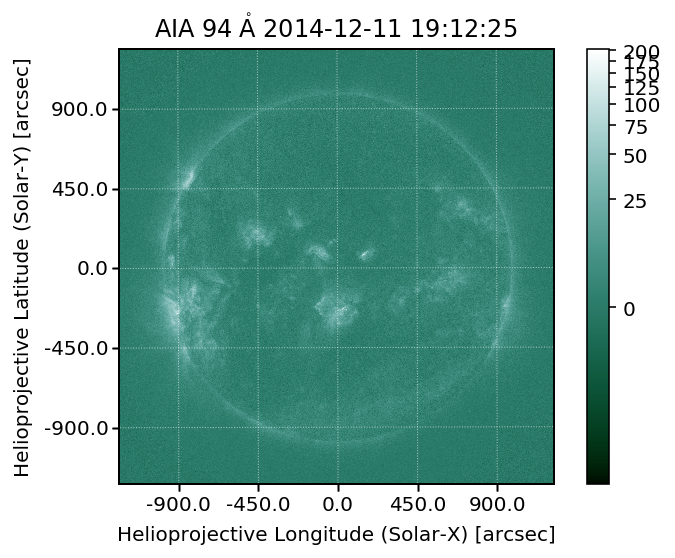

In [27]:
plt.figure()
aiamap.plot()
plt.colorbar()
plt.show()

In [28]:
data_max = aiamap.max()

In [29]:
mask = aiamap.data < data_max * 0.05

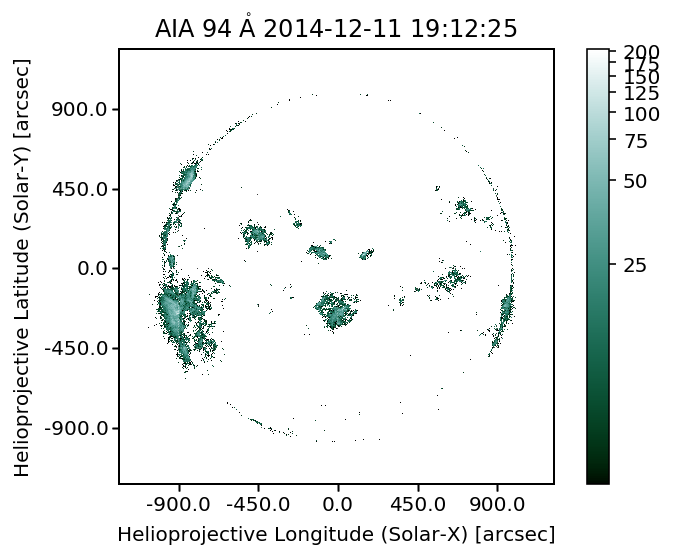

In [30]:
aiamap.mask = mask
plt.figure()
aiamap.plot()
plt.colorbar()
plt.show()

In [31]:
data2 = ndimage.gaussian_filter(aiamap.data * ~mask, 16)

In [32]:
data2[data2 < 30] = 0

In [33]:
aiamap2 = sunpy.map.Map(data2, aiamap.meta)

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


In [34]:
labels, n = ndimage.label(aiamap2.data)

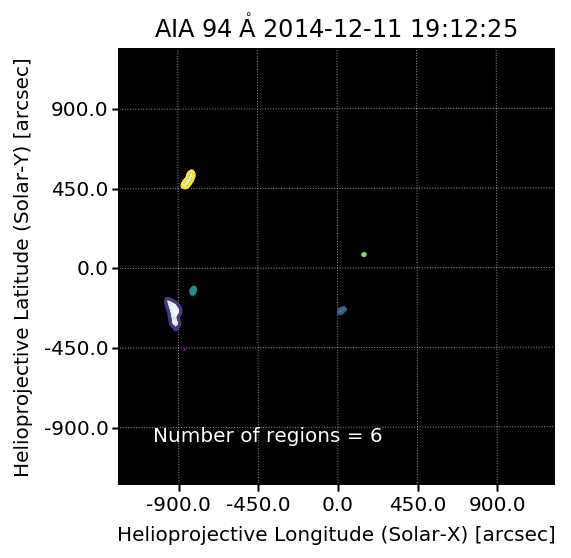

In [35]:
plt.figure()
aiamap2.plot()
plt.contour(labels)
plt.figtext(0.3, 0.2, 'Number of regions = {}'.format(n), color='white')
plt.show()
